The goal of this notebook is to test an algorithm that may be implemented in the **registration** notebook. 

The principle is to compare two profiles in order to find the offset required in order to minimize the difference between the two profiles

key points:
 * use absolute value when doing the difference
 * narrow down the range of motion of the second profile over the "reference" one, something like 10 or 20 pixels for example

# import 

In [85]:
import numpy as np
import pandas as pd
import os

import scipy

import matplotlib.pyplot as plt
%matplotlib notebook

from ipywidgets import interactive
from IPython.display import display
import ipywidgets as widgets

# load profile 

In [2]:
filename = "data/vertical_profiles.txt"
assert os.path.exists(filename)

In [3]:
pd_data = pd.read_csv(filename, skiprows=9)

In [4]:
pd_data

,##y_axis,# col.1,# col.2
0,560,0.528983,0.518230
1,561,0.542648,0.513951
2,562,0.550394,0.531603
3,563,0.546004,0.515176
4,564,0.559552,0.505158
...,...,...,...
323,883,1.021830,0.995650
324,884,1.002355,1.006492
325,885,1.003664,1.019801
326,886,1.000419,1.018811


In [5]:
x_axis = np.asarray(pd_data['##y_axis'])
profile1 = np.asarray(pd_data['# col.1'])
profile2 = np.asarray(pd_data['# col.2'])
# profile2 = profile1[:]

## before applying an offset 

<IPython.core.display.Javascript object>


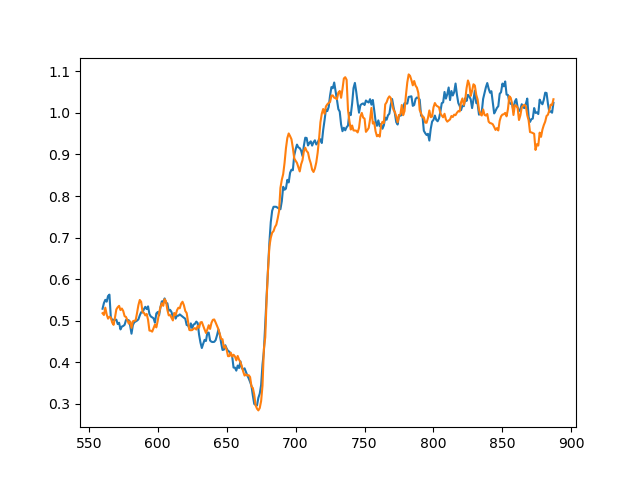

In [6]:
fig, ax = plt.subplots(num="before offset")
ax.plot(x_axis, profile1, x_axis, profile2)

## applying an offset of 5 pixels on profile2 

In [9]:
xoffset = 5

profile2_shifted = np.roll(profile2, xoffset)
profile2_shifted[:xoffset] = profile2_shifted[xoffset]

<IPython.core.display.Javascript object>


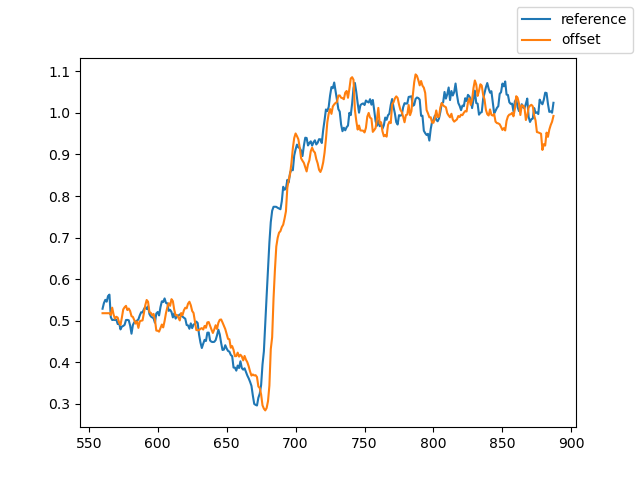

In [10]:
fig, ax = plt.subplots(num=f"after offset by {xoffset} pixels to the right")
ax.plot(x_axis, profile1, label='reference')
ax.plot(x_axis, profile2_shifted, label='offset')
fig.legend()

# trying the algo on this data set 

In [11]:
rolling_offset = 20

In [12]:
list_profiles = []
for _offset in np.arange(-rolling_offset, rolling_offset):
    list_profiles.append(np.roll(profile2_shifted, _offset))

In [13]:
def sum_abs_diff(profile_a, profile_b):
    list_diff = profile_a - profile_b
    abs_list_diff = [np.abs(_value) for _value in list_diff]
    return np.sum(abs_list_diff)

In [14]:
list_sum_abs_diff = []
for _profile in list_profiles:
    list_sum_abs_diff.append(sum_abs_diff(_profile, profile1))

<IPython.core.display.Javascript object>


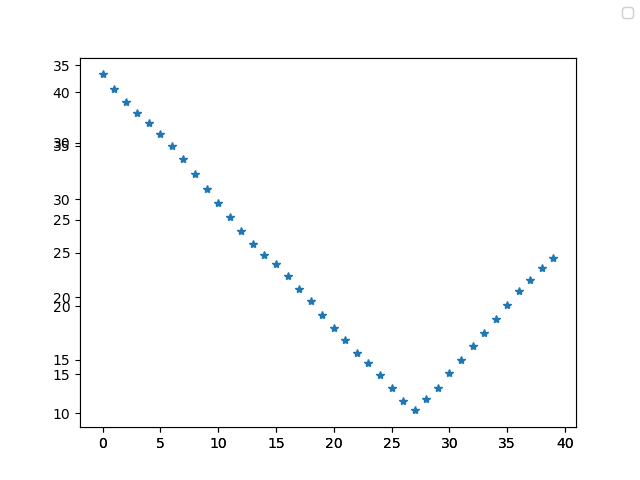

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [15]:
fig, ax = plt.subplots(num=f"list sum abs diff")
ax.plot(list_sum_abs_diff, '*')
fig.legend()

In [16]:
min_value = np.min(list_sum_abs_diff)
print(min_value)
min_index = np.where(min_value == list_sum_abs_diff)[0][0]
print(min_index)

12.664655069999998
15


In [17]:
offset_to_apply = rolling_offset - min_index
print(f"{offset_to_apply = }")

offset_to_apply = 5


!!!! works great

# Let's try with a negative offset 

In [19]:
xoffset = -7

profile2_shifted = np.roll(profile2, xoffset)
profile2_shifted[xoffset:] = profile2_shifted[xoffset]

<IPython.core.display.Javascript object>


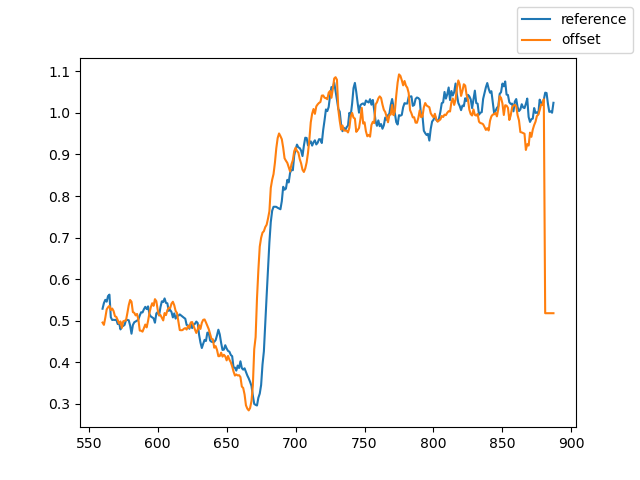

In [20]:
fig, ax = plt.subplots(num=f"after offset by {xoffset} pixels to the right")
ax.plot(x_axis, profile1, label='reference')
ax.plot(x_axis, profile2_shifted, label='offset')
fig.legend()

In [21]:
list_profiles = []
for _offset in np.arange(-rolling_offset, rolling_offset):
    list_profiles.append(np.roll(profile2_shifted, _offset))

In [22]:
rolling_offset = 20

In [23]:
list_sum_abs_diff = []
for _profile in list_profiles:
    list_sum_abs_diff.append(sum_abs_diff(_profile, profile1))

In [24]:
fig, ax = plt.subplots(num=f"list sum abs diff")
ax.plot(list_sum_abs_diff, '*')
fig.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [25]:
min_value = np.min(list_sum_abs_diff)
print(min_value)
min_index = np.where(min_value == list_sum_abs_diff)[0][0]
print(min_index)

10.269868509999998
27


In [26]:
offset_found = rolling_offset - min_index
print(f"{offset_found = }")

offset_found = -7


# let's automate the whole process 

In [27]:
profile_reference = profile1
profile_work = profile2_shifted

In [28]:
def sum_abs_diff(profile_a, profile_b):
    list_diff = profile_a - profile_b
    abs_list_diff = [np.abs(_value) for _value in list_diff]
    return np.sum(abs_list_diff)

def calculate_pixel_offset(profile_reference=None, working_profile=None, max_pixel_range=20):
    list_profiles = []
    for _offset in np.arange(-max_pixel_range, max_pixel_range):
        list_profiles.append(np.roll(working_profile, _offset))
        
    list_sum_abs_diff = []
    for _profile in list_profiles:
        list_sum_abs_diff.append(sum_abs_diff(_profile, profile1))
        
    min_value = np.min(list_sum_abs_diff)
    min_index = np.where(min_value == list_sum_abs_diff)[0][0]
        
    offset_found = max_pixel_range - min_index
        
    return offset_found

In [29]:
print(calculate_pixel_offset(profile_reference=profile_reference, working_profile=profile_work))

-7


# test using several profiles 

### loading the profiles 

In [115]:
# filename = "data/n_vertical_profiles.txt"
skiprows = 22
filename = "data/vertical_profiles_3pixel_wide.txt"  
skiprows = 18
filename = "data/vertical_profiles_5pixel_wide.txt"
assert os.path.exists(filename)

In [116]:
pd_data = pd.read_csv(filename, skiprows=skiprows)

In [117]:
pd_data

,##x_axis,# col.1,# col.2,# col.3,# col.4,# col.5,# col.6,# col.7,# col.8,# col.9,# col.10,# col.11
0,1108,0.653929,0.658332,0.671670,0.649126,0.682663,0.673157,0.653899,0.650142,0.680177,0.660111,0.630936
1,1109,0.639787,0.644630,0.657182,0.647720,0.666524,0.685941,0.663826,0.645638,0.698320,0.663978,0.630978
2,1110,0.647782,0.657785,0.672459,0.639321,0.669803,0.678647,0.659717,0.646687,0.697203,0.659385,0.628722
3,1111,0.646360,0.650923,0.673062,0.651669,0.658431,0.672020,0.641835,0.656370,0.702141,0.653410,0.617702
4,1112,0.650344,0.656428,0.676541,0.669184,0.633901,0.670233,0.645028,0.666299,0.715871,0.658355,0.616806
...,...,...,...,...,...,...,...,...,...,...,...,...
369,1477,0.975957,0.976713,0.976313,1.020782,0.999080,0.998461,0.971803,1.026751,0.971686,1.016019,0.980838
370,1478,0.966791,0.988624,0.981236,1.031707,1.011146,0.997550,0.985919,1.014448,0.974882,1.031343,0.976739
371,1479,0.968293,0.980011,0.986532,1.040044,1.015072,0.981393,0.982095,1.009313,0.985483,1.032966,0.967995
372,1480,0.967920,0.974041,0.994333,1.032250,0.999064,0.962452,0.972685,1.011634,0.989487,1.020178,0.970886


In [118]:
x_axis = np.asarray(pd_data['##x_axis'])
profiles = {}
for _index in np.arange(1, 11):
    _profile = np.asarray(pd_data[f"# col.{_index}"])
    profiles[_index] = _profile

In [119]:
def sum_abs_diff(profile_a, profile_b):
    list_diff = profile_a - profile_b
    abs_list_diff = [np.abs(_value) for _value in list_diff]
    return np.sum(abs_list_diff)

def calculate_pixel_offset(profile_reference=None, working_profile=None, max_pixel_range=20):
    list_profiles = []
    for _offset in np.arange(-max_pixel_range, max_pixel_range):
        list_profiles.append(np.roll(working_profile, _offset))

    list_sum_abs_diff = []
    for _profile in list_profiles:
        list_sum_abs_diff.append(sum_abs_diff(_profile, profile_reference))

    min_value = np.min(list_sum_abs_diff)
    min_index = np.where(min_value == list_sum_abs_diff)[0][0]

    offset_found = max_pixel_range - min_index

    return {'offset_found': offset_found,
            'list_sum_abs_diff': list_sum_abs_diff}

In [120]:
reference_profile = profiles[1]

In [121]:
list_offset = []
list_sum_abs_diff = {}
for _key in profiles.keys():
    working_profile = profiles[_key]
    _dict = calculate_pixel_offset(profile_reference=reference_profile,
                                         working_profile=working_profile)
    list_offset.append(_dict['offset_found'])
    list_sum_abs_diff[_key] = _dict['list_sum_abs_diff']
    

<IPython.core.display.Javascript object>


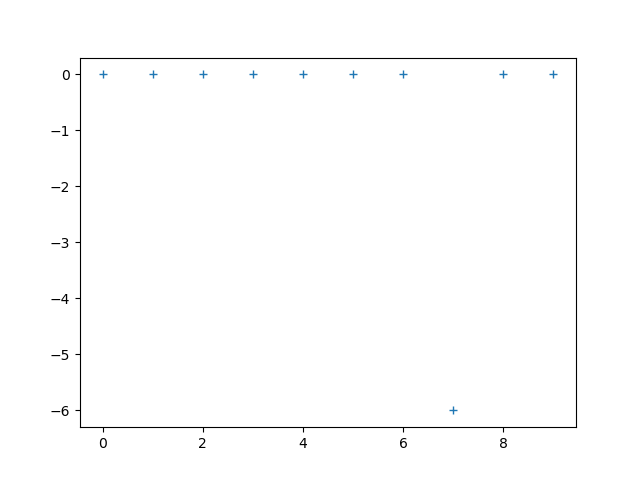

In [122]:
fig, ax = plt.subplots(num='offsets')
ax.plot(list_offset, '+')

<IPython.core.display.Javascript object>


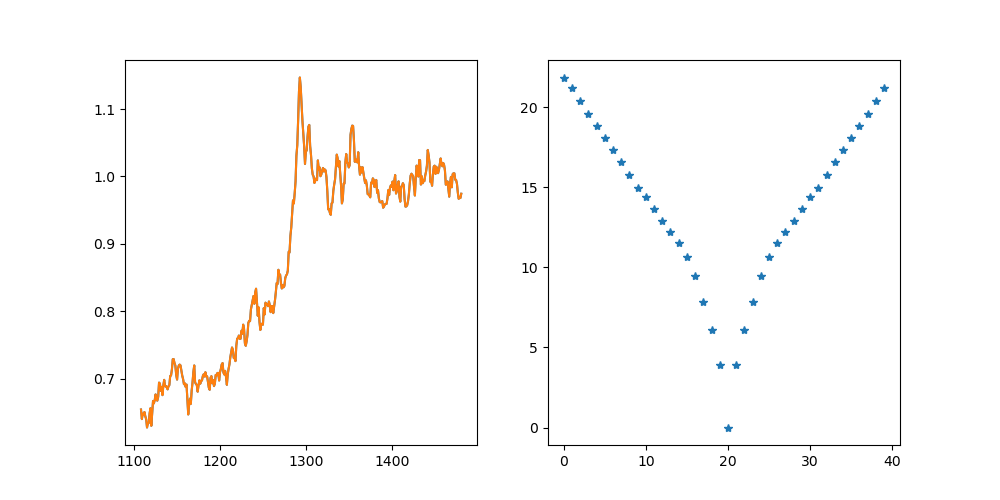

interactive(children=(IntSlider(value=1, description='index', max=10, min=1), Output()), _dom_classes=('widget…

In [124]:
fig, ax = plt.subplots(num=f"profiles", nrows=1, ncols=2, figsize=(10,5))

def plot(index):
    ax[0].cla()
    ax[0].plot(x_axis, reference_profile, label='reference')
    ax[0].plot(x_axis, profiles[index], label=f"profile #{index}")
    
    ax[1].cla()
    ax[1].plot(list_sum_abs_diff[index], '*')
   
compare_profiles = interactive(plot,
                           index=widgets.IntSlider(min=1,
                                                   value=1,
                                                   max=len(list_offset)))


display(compare_profiles)

### Let's try to blur the data first

In [125]:
scipy.signal.medfilt(_test)

array([0.6364229 , 0.6429328 , 0.6556469 , 0.6556469 , 0.6664801 ,
       0.6613709 , 0.6613709 , 0.65562534, 0.65189946, 0.65562534,
       0.6566037 , 0.66844225, 0.6631002 , 0.6631002 , 0.65931755,
       0.6392649 , 0.6392649 , 0.6246145 , 0.63353306, 0.6213707 ,
       0.6213707 , 0.6213707 , 0.6363526 , 0.64526975, 0.66333485,
       0.6713788 , 0.6849822 , 0.6903912 , 0.6953013 , 0.6953013 ,
       0.6953013 , 0.6962722 , 0.6962722 , 0.6955514 , 0.68803   ,
       0.6775067 , 0.68803   , 0.69171256, 0.69171256, 0.63233805,
       0.63233805, 0.6556696 , 0.66689855, 0.66689855, 0.6559082 ,
       0.6508436 , 0.6508436 , 0.6804944 , 0.68512034, 0.6886258 ,
       0.68512034, 0.64468277, 0.64468277, 0.64947987, 0.6583407 ,
       0.6621336 , 0.6621336 , 0.65900505, 0.6574657 , 0.65900505,
       0.70682895, 0.72791696, 0.735159  , 0.74054694, 0.7453319 ,
       0.74727833, 0.750238  , 0.74727833, 0.7382138 , 0.72423905,
       0.7239363 , 0.72423905, 0.73752165, 0.75750566, 0.75750

<IPython.core.display.Javascript object>


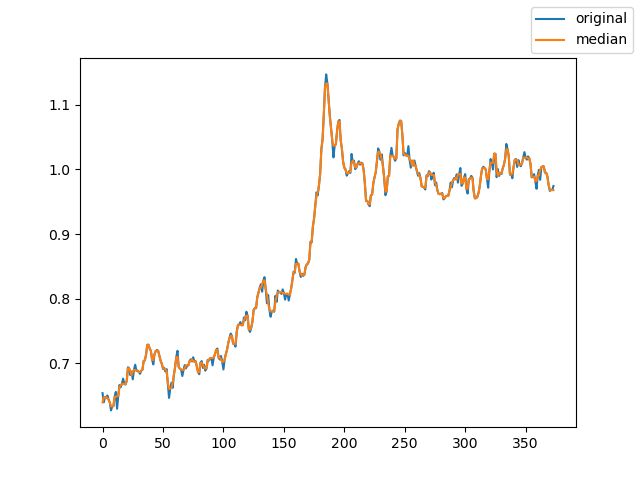

In [126]:
_test = profiles[1]
median_test = scipy.signal.medfilt(_test, kernel_size=3)
fig, ax = plt.subplots(num='median filter')
ax.plot(_test, label='original')
ax.plot(median_test, label='median')
fig.legend()

In [95]:
kernel_size = 3
reference_profile_median = scipy.signal.medfilt(reference_profile, kernel_size=kernel_size)


In [97]:
profiles_median = {}
for _key in profiles.keys():
    profiles_median[_key] = scipy.signal.medfilt(profiles[_key], kernel_size=kernel_size)

In [98]:
list_offset_median = []
list_sum_abs_diff_median = {}
for _key in profiles.keys():
    working_profile = profiles_median[_key]
    _dict = calculate_pixel_offset(profile_reference=reference_profile_median,
                                         working_profile=working_profile)
    list_offset_median.append(_dict['offset_found'])
    list_sum_abs_diff_median[_key] = _dict['list_sum_abs_diff']
    

<IPython.core.display.Javascript object>


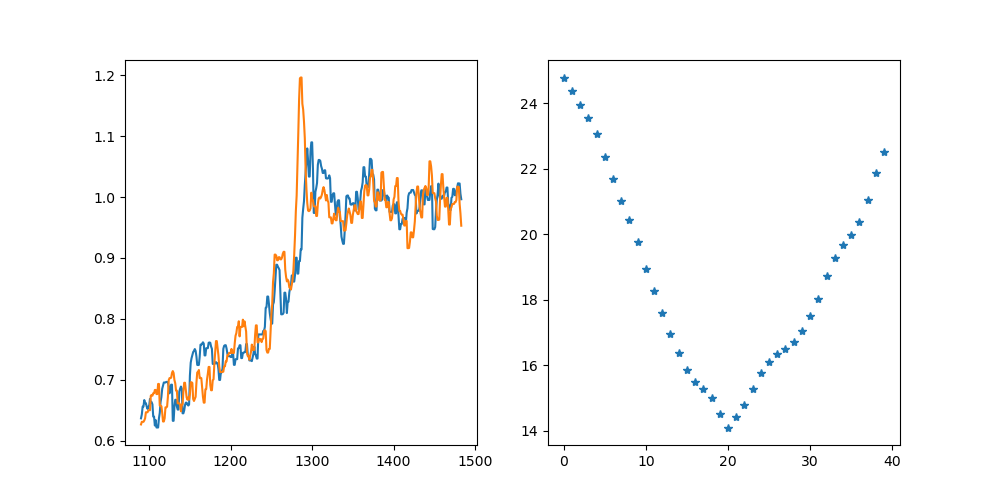

interactive(children=(IntSlider(value=1, description='index', max=14, min=1), Output()), _dom_classes=('widget…

In [100]:
fig, ax = plt.subplots(num=f"profiles median", nrows=1, ncols=2, figsize=(10,5))

def plot(index):
    ax[0].cla()
    ax[0].plot(x_axis, reference_profile_median, label='reference')
    ax[0].plot(x_axis, profiles_median[index], label=f"profile #{index}")
    
    ax[1].cla()
    ax[1].plot(list_sum_abs_diff_median[index], '*')
   
compare_profiles = interactive(plot,
                           index=widgets.IntSlider(min=1,
                                                   value=1,
                                                   max=len(list_offset)))


display(compare_profiles)